In [1]:
import fiona
import geopandas as gpd
import matplotlib.pyplot as plt

from matplotlib_map_utils.core.inset_map import InsetMap, inset_map
from matplotlib_map_utils.core.scale_bar import ScaleBar, scale_bar
from matplotlib_map_utils.core.north_arrow import NorthArrow, north_arrow

In [2]:
!ls ../data

india_admin_areas.geojson   nederland_pop_centres.gpkg	 sources
nederland_admin_areas.gpkg  nederland_pop_stats.feather


In [3]:
fiona.listlayers('../data/nederland_admin_areas.gpkg')

['gemeentegebied', 'landgebied', 'provinciegebied']

In [4]:
country = gpd.read_file('../data/nederland_admin_areas.gpkg', layer='landgebied')
country.shape

(1, 4)

In [5]:
country.head(1)

,identificatie,naam,code,geometry
0,LND6030,Nederland,6030,"MULTIPOLYGON (((123361.236 383402.986, 123365...."


In [6]:
cities = gpd.read_file('../data/nederland_admin_areas.gpkg', layer='gemeentegebied')
cities.shape

(342, 6)

In [7]:
cities.head(1)

,identificatie,naam,code,ligt_in_provincie_code,ligt_in_provincie_naam,geometry
0,GM0263,Maasdriel,0263,25,Gelderland,"MULTIPOLYGON (((146637.319 416737.822, 146700 ..."


In [8]:
enschede = cities.loc[cities['naam']=='Enschede']
enschede.shape

(1, 6)

In [9]:
enschede.head(1)

,identificatie,naam,code,ligt_in_provincie_code,ligt_in_provincie_naam,geometry
82,GM0153,Enschede,0153,23,Overijssel,"MULTIPOLYGON (((252038.609 465222.168, 252046...."


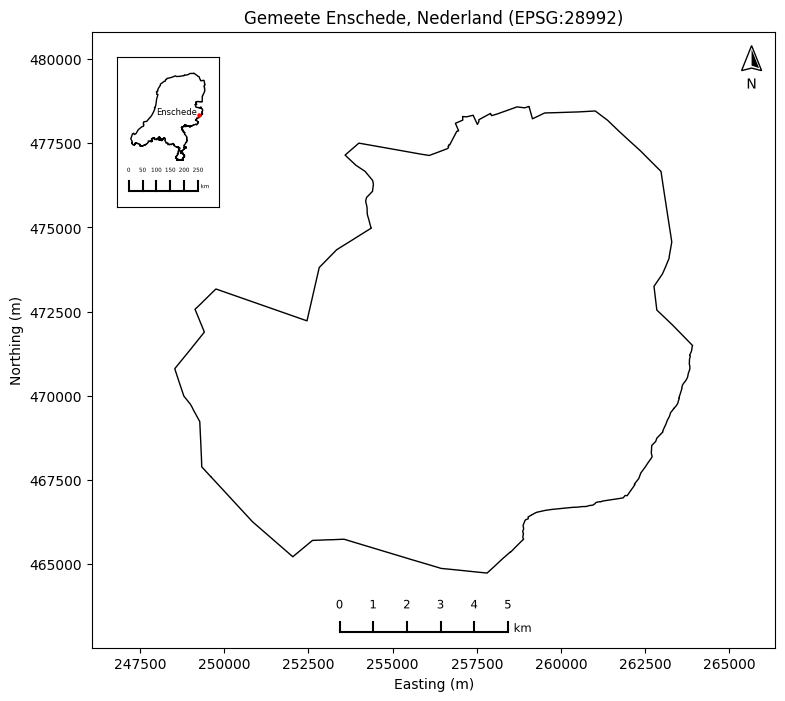

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
enschede.plot(ax=ax, color='none')

xlim = ax.get_xlim()
ylim = ax.get_ylim()
x_centre = sum(xlim) / 2
y_centre = sum(ylim) / 2
x_range = (xlim[1] - xlim[0]) * 1.20 / 2
y_range = (ylim[1] - ylim[0]) * 1.20 / 2

ax.set_xlim(x_centre - x_range, x_centre + x_range)
ax.set_ylim(y_centre - y_range, y_centre + y_range)

scale_bar(ax=ax, location='lower center', style='ticks', bar={'projection': enschede.crs}, text={'fontsize': 'small'})
north_arrow(ax=ax, location='upper right', rotation={'degrees': 0}, shadow=False, scale=0.25, label={'fontsize': 'medium'})

inset = inset_map(ax=ax, location='upper left', size=1.5, xticks=[], yticks=[])
country.plot(ax=inset, color='none')

xlim = inset.get_xlim()
ylim = inset.get_ylim()
x_centre = sum(xlim) / 2
y_centre = sum(ylim) / 2
x_range = (xlim[1] - xlim[0]) * 1.25 / 2
y_range = (ylim[1] - ylim[0]) * 1.25 / 2

inset.set_xlim(x_centre - x_range, x_centre + x_range)
inset.set_ylim(y_centre - y_range * 1.5, y_centre + y_range)

enschede_marker = enschede.geometry.centroid
enschede_marker.plot(ax=inset, color='red', marker='o', markersize=5)
inset.annotate('Enschede', xy=(enschede_marker.x.iloc[0] - 80000, enschede_marker.y.iloc[0]), ha='center', fontsize=6)

scale_bar(ax=inset, location='lower center', style='ticks', bar={'projection': country.crs, 'length': 0.7}, text={'fontsize': 4})

ax.set_title(f'Gemeete Enschede, Nederland ({enschede.crs})')
ax.set_xlabel('Easting (m)')
ax.set_ylabel('Northing (m)')

plt.show()